In [1]:
import pandas as pd
import numpy as np
import time
import scipy.stats as stats
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout

In [2]:
#File Importing (total 48 files)
def load_file(path,act):
    file = pd.read_hdf(path,key=act)
    #s_train.append(file)
    return file

# s1-s15:walk
s1 = load_file('wrist_ppg_data/s15_all_signals.hdf5','walk')
s2 = load_file('wrist_ppg_data/s16_all_signals.hdf5','walk')
s3 = load_file('wrist_ppg_data/s17_all_signals.hdf5','walk')
s4 = load_file('wrist_ppg_data/s21_all_signals.hdf5','walk')
s5 = load_file('wrist_ppg_data/s22_all_signals.hdf5','walk')
s6 = load_file('wrist_ppg_data/s23_all_signals.hdf5','walk')
s7 = load_file('wrist_ppg_data/s24_all_signals.hdf5','walk')
s8 = load_file('wrist_ppg_data/s25_all_signals.hdf5','walk')
s9 = load_file('wrist_ppg_data/s26_all_signals.hdf5','walk')
s10 = load_file('wrist_ppg_data/s27_all_signals.hdf5','walk')
s11 = load_file('wrist_ppg_data/s28_all_signals.hdf5','walk')
s12 = load_file('wrist_ppg_data/s30_all_signals.hdf5','walk')
s13 = load_file('wrist_ppg_data/s31_all_signals.hdf5','walk')
s14 = load_file('wrist_ppg_data/s32_all_signals.hdf5','walk')
s15 = load_file('wrist_ppg_data/s34_all_signals.hdf5','walk')
# s16-s19:run
s16 = load_file('wrist_ppg_data/s15_all_signals.hdf5','run')
s17 = load_file('wrist_ppg_data/s24_all_signals.hdf5','run')
s18 = load_file('wrist_ppg_data/s28_all_signals.hdf5','run')
s19 = load_file('wrist_ppg_data/s34_all_signals.hdf5','run')
# s20-s34:lrb
s20 = load_file('wrist_ppg_data/s15_all_signals.hdf5','lrb')
s21 = load_file('wrist_ppg_data/s16_all_signals.hdf5','lrb')
s22 = load_file('wrist_ppg_data/s17_all_signals.hdf5','lrb')
s23 = load_file('wrist_ppg_data/s21_all_signals.hdf5','lrb')
s24 = load_file('wrist_ppg_data/s22_all_signals.hdf5','lrb')
s25 = load_file('wrist_ppg_data/s23_all_signals.hdf5','lrb')
s26 = load_file('wrist_ppg_data/s24_all_signals.hdf5','lrb')
s27 = load_file('wrist_ppg_data/s25_all_signals.hdf5','lrb')
s28 = load_file('wrist_ppg_data/s26_all_signals.hdf5','lrb')
s29 = load_file('wrist_ppg_data/s27_all_signals.hdf5','lrb')
s30 = load_file('wrist_ppg_data/s28_all_signals.hdf5','lrb')
s31 = load_file('wrist_ppg_data/s30_all_signals.hdf5','lrb')
s32 = load_file('wrist_ppg_data/s31_all_signals.hdf5','lrb')
s33 = load_file('wrist_ppg_data/s32_all_signals.hdf5','lrb')
s34 = load_file('wrist_ppg_data/s34_all_signals.hdf5','lrb')
# s35-s48:hrb
s35 = load_file('wrist_ppg_data/s15_all_signals.hdf5','hrb')
s36 = load_file('wrist_ppg_data/s16_all_signals.hdf5','hrb')
s37 = load_file('wrist_ppg_data/s17_all_signals.hdf5','hrb')
s38 = load_file('wrist_ppg_data/s21_all_signals.hdf5','hrb')
s39 = load_file('wrist_ppg_data/s23_all_signals.hdf5','hrb')
s40 = load_file('wrist_ppg_data/s24_all_signals.hdf5','hrb')
s41 = load_file('wrist_ppg_data/s25_all_signals.hdf5','hrb')
s42 = load_file('wrist_ppg_data/s26_all_signals.hdf5','hrb')
s43 = load_file('wrist_ppg_data/s27_all_signals.hdf5','hrb')
s44 = load_file('wrist_ppg_data/s28_all_signals.hdf5','hrb')
s45 = load_file('wrist_ppg_data/s30_all_signals.hdf5','hrb')
s46 = load_file('wrist_ppg_data/s31_all_signals.hdf5','hrb')
s47 = load_file('wrist_ppg_data/s32_all_signals.hdf5','hrb')
s48 = load_file('wrist_ppg_data/s34_all_signals.hdf5','hrb')

In [3]:
# concat data and add label column
def concat_file(startn,endn):
    frame = []
    for i in range(startn,endn):
        ss = 's' + str(i) #represent s1,s2,...,s48
        s_con = eval(ss) #convert to pandas dataframe
        frame.append(s_con) #saved in a list
    return frame

# add label
d_walk = pd.concat(concat_file(1,16))
d_walk['label'] = 0
d_run = pd.concat(concat_file(16,20))
d_run['label'] = 1
d_lrb = pd.concat(concat_file(20,35))
d_lrb['label'] = 2
d_hrb = pd.concat(concat_file(35,49))
d_hrb['label'] = 3
data = pd.concat([d_walk,d_run,d_lrb,d_hrb])
print(type(data))
print(data.shape)
#print(data.head)

<class 'pandas.core.frame.DataFrame'>
(5685320, 19)


In [4]:
#delete useless information
data = data.drop(['events','chest_ecg','chest_accelerometer_x','chest_accelerometer_y','chest_accelerometer_z','wrist_right_hr','ankle_left_ppg','ankle_left_accelerometer_x','ankle_left_accelerometer_y','ankle_left_accelerometer_z','ankle_right_ppg','ankle_right_accelerometer_x','ankle_right_accelerometer_y','ankle_right_accelerometer_z'],axis = 1).copy()
data.head(5776993)

,wrist_left_ppg,wrist_left_accelerometer_x,wrist_left_accelerometer_y,wrist_left_accelerometer_z,label
time,,,,,
0.000,57.329756,-24.990378,65.994738,8.945125,0
0.005,56.488417,-24.881731,65.815580,8.646757,0
0.010,55.664626,-24.787094,65.630114,8.391348,0
0.015,54.819482,-24.734716,65.507915,8.195751,0
0.020,53.930892,-24.746885,65.507780,8.067541,0
...,...,...,...,...,...
601.195,-372.382828,25.538449,-57.551305,-10.661336,3
601.200,-389.054111,24.734836,-57.198278,-11.747110,3
601.205,-407.895999,23.080670,-57.044086,-12.961662,3


In [5]:
# Scale Standardization
xdata = data[['wrist_left_ppg','wrist_left_accelerometer_x','wrist_left_accelerometer_y','wrist_left_accelerometer_z']]
min_max_scaler = MinMaxScaler(feature_range=(0,1)) #scale to the range (-1,1)
X = min_max_scaler.fit_transform(xdata)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(5685320, 4)


In [6]:
#combine scaled data
scaled_data = pd.DataFrame(data = X, columns = ['ppg','accx','accy','accz'])
scaled_data['label'] = data['label'].values
print(scaled_data.shape)
print(type(scaled_data))
print(scaled_data.head(5776992))

(5685320, 5)
<class 'pandas.core.frame.DataFrame'>
              ppg      accx      accy      accz  label
0        0.545878  0.420316  0.696765  0.530879      0
1        0.545621  0.420647  0.696185  0.529966      0
2        0.545369  0.420934  0.695584  0.529184      0
3        0.545111  0.421094  0.695189  0.528585      0
4        0.544839  0.421057  0.695188  0.528192      0
...           ...       ...       ...       ...    ...
5685315  0.414572  0.573932  0.296636  0.470847      3
5685316  0.409478  0.571488  0.297780  0.467522      3
5685317  0.403720  0.566460  0.298279  0.463804      3
5685318  0.397508  0.559146  0.298510  0.459897      3
5685319  0.390878  0.550530  0.298480  0.456085      3

[5685320 rows x 5 columns]


In [7]:
# Sliding Window Segment
fs = 200
frame_size = fs * 8 # one frame consists of 2 seconds
hop_size = fs * 1  #50% overlap

def get_frames(x_train, frame_size, hop_size):
    N_FEATURES = 4
    frames = []
    labels = []
    
    for i in range(0, len(x_train) - frame_size, hop_size):
        ppg = x_train['ppg'].values[i:i+frame_size]
        x = x_train['accx'].values[i:i+frame_size]
        y = x_train['accy'].values[i:i+frame_size]
        z = x_train['accz'].values[i:i+frame_size]
        
        # retrieve the most often used label in this segment
        label = stats.mode(x_train['label'][i:i+frame_size])[0][0]
        frames.append([ppg,x, y, z])
        labels.append(label)
    
    # bring the segment into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)
    return frames, labels

X,y = get_frames(scaled_data, frame_size, hop_size)
print(X.shape,y.shape) #(5776992*features)/(frame_size*2)
print(y)

(28419, 1600, 4) (28419,)
[0 0 0 ... 3 3 3]


In [8]:
# one-hot convertion
y = tf.keras.utils.to_categorical(y)
print(type(y))
print(y.shape)
print(y)

<class 'numpy.ndarray'>
(28419, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [9]:
# split training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19893, 1600, 4) (8526, 1600, 4) (19893, 4) (8526, 4)


In [10]:
# 3D array convertion
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [11]:
#Generate LSTM Model
time_steps = X_train.shape[1]
features = X_train.shape[2]
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(30,input_shape = (time_steps,features),return_sequences=True))
model.add(tf.keras.layers.LSTM(30))
model.add(Dense(15,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1600, 30)          4200      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 15)                465       
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 64        
Total params: 12,109
Trainable params: 12,079
Non-trainable params: 30
___________________________________________________

In [12]:
#Model compiler settings
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
#Model Training
t1 = time.time()
history = model.fit(X_train,y_train,epochs = 120,batch_size = 64,
                   validation_split = 0.2, shuffle = True)
t2 = time.time()
dt = t2 - t1
print(dt)

Epoch 1/150
249/249 [==============================] - 307s 1s/step - loss: 0.9198 - accuracy: 0.5500 - val_loss: 0.9267 - val_accuracy: 0.5393
Epoch 2/150
249/249 [==============================] - 339s 1s/step - loss: 0.9129 - accuracy: 0.5488 - val_loss: 1.8739 - val_accuracy: 0.3878
Epoch 3/150
249/249 [==============================] - 351s 1s/step - loss: 0.9765 - accuracy: 0.5305 - val_loss: 1.6238 - val_accuracy: 0.4931
Epoch 4/150
249/249 [==============================] - 394s 2s/step - loss: 0.9214 - accuracy: 0.5478 - val_loss: 0.9763 - val_accuracy: 0.5627
Epoch 5/150
249/249 [==============================] - 395s 2s/step - loss: 0.9074 - accuracy: 0.5525 - val_loss: 0.9709 - val_accuracy: 0.5057
Epoch 6/150
249/249 [==============================] - 379s 2s/step - loss: 0.9127 - accuracy: 0.5548 - val_loss: 1.2801 - val_accuracy: 0.3946
Epoch 7/150
249/249 [==============================] - 396s 2s/step - loss: 0.8996 - accuracy: 0.5569 - val_loss: 0.9740 - val_accuracy:

249/249 [==============================] - 401s 2s/step - loss: 0.5975 - accuracy: 0.7104 - val_loss: 0.5643 - val_accuracy: 0.7263
Epoch 114/150
249/249 [==============================] - 369s 1s/step - loss: 0.5918 - accuracy: 0.7149 - val_loss: 0.5735 - val_accuracy: 0.7120
Epoch 115/150
249/249 [==============================] - 369s 1s/step - loss: 0.5767 - accuracy: 0.7250 - val_loss: 0.5371 - val_accuracy: 0.7482
Epoch 116/150
249/249 [==============================] - 381s 2s/step - loss: 0.5620 - accuracy: 0.7346 - val_loss: 0.6571 - val_accuracy: 0.6919
Epoch 117/150
249/249 [==============================] - 415s 2s/step - loss: 0.5795 - accuracy: 0.7252 - val_loss: 0.6148 - val_accuracy: 0.7002
Epoch 118/150
249/249 [==============================] - 389s 2s/step - loss: 0.5364 - accuracy: 0.7537 - val_loss: 0.4905 - val_accuracy: 0.7801
Epoch 119/150
249/249 [==============================] - 377s 2s/step - loss: 0.5238 - accuracy: 0.7564 - val_loss: 0.4922 - val_accuracy:

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size = 64)

134/134 [==============================] - 49s 367ms/step - loss: 0.3658 - accuracy: 0.8456


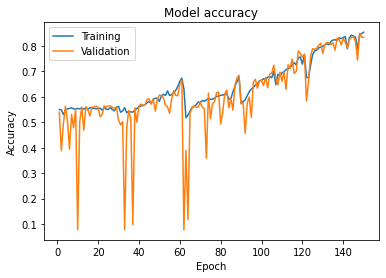

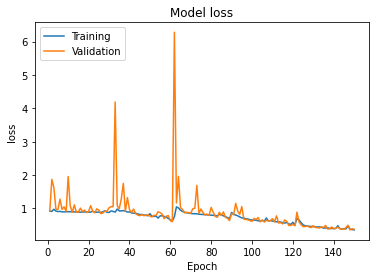

In [16]:
def plot_learning_curve(history, epochs):
    # Plot training and valiation accuracy values    
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper left')
    plt.show()
plot_learning_curve(history, 120)

In [37]:
# change format to plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
y_test = np.argmax(y_test, axis = 1) ##change one-hot format to singe number
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred.shape,y_test.shape

((8527,), (8527,))

Text(0, 0.5, 'True Label')

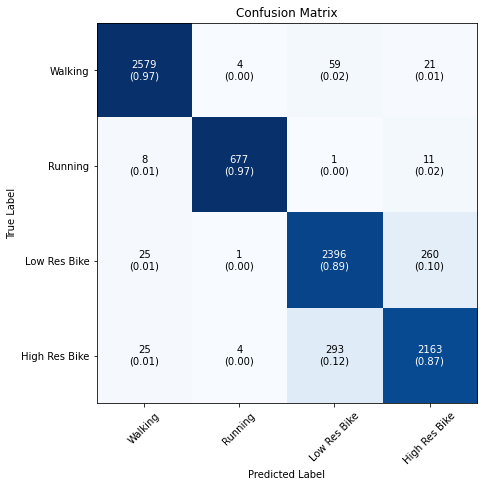

In [38]:
#plot confusion matrix
Activities = ['Walking', 'Running', 'Low Res Bike', 'High Res Bike']
#accuracy_score(y_test, y_pred)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=Activities, show_normed=True, figsize=(7,7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.show()